## Problem Set 3 (Part 1 of 2): Interacting with the Alpha Vantage API using Python libraries

As automation and algorithms continue to disrupt the investment managmentment business, it is important to know how to access finacial data that is realtime and interactive. In this problem set we will access the Alpha Vantage API to build datasets of recent stock performance. Alpha Vantage is a provider of free APIs for realtime and historical data on stocks, forex, and cryptocurrencies.

This part of the exercise demonstrates:

1. Setting up a programming environment to work with APIs
2. Interpreting documentation to change parameters
3. Using the 'requests' library to make HTTP requests
4. Getting data through HTTP requests
5. Using the 'alpha_vantage' library to access the API and format the data
6. Creating an Excel file from the data

Documentation links:
<br />Alpha Vantage: https://www.alphavantage.co/documentation/
<br />Alpha Vantage Python library: https://alpha-vantage.readthedocs.io/en/latest/#
<br />Requests library: https://2.python-requests.org/en/master/
<br />Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

______

#### Get API key

Go to https://www.alphavantage.co/support/#api-key and obtain an API key. Copy this key into the "api_key" variable in the next cell:

In [11]:
api_key = "E2XUHG8ME7PBWDMT"

Assign a stock ticker symbol of your choosing to the 'ticker' variable:

In [9]:
ticker = "WGO"

Import the appropriate libraries in the lines below each comment:

In [1]:
# pandas
import pandas as pd
# requests
import requests as requests
# alpha_vantage TimeSeries class
from alpha_vantage.timeseries import TimeSeries
# mmatplotlib.pyplot as plt
import matplotlib.pyplot as plt

#### Access API through an HTTP request

Assign the API url to the variable "link".
<br />(refer to the Alpha Vantage documention)
<br />
<br />Format the url string to include the "api_key" variable and the "ticker" variable Reassign the url u

In [12]:
link = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=1min&apikey={api_key}"
print(link)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=WGO&interval=1min&apikey=E2XUHG8ME7PBWDMT


Refer to the requests documentation to set up a get request to the above url. Assign the output to a new variable, preferably your ticket symbol. 

In [13]:
WGO = requests.get(link)

Print the HTTP response:

In [14]:
print(WGO)

<Response [200]>


Print the data:

In [15]:
print(wgo_data)

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2019-09-24 09:31:00  39.8400  39.8700  39.8400   39.8700        0.0
2019-09-24 09:32:00  39.6600  39.6600  39.6600   39.6600      100.0
2019-09-24 09:33:00  39.8050  40.2220  39.8000   40.2220     3126.0
2019-09-24 09:34:00  40.1100  40.1100  40.1100   40.1100      110.0
2019-09-24 09:36:00  40.1500  40.1500  40.1500   40.1500      100.0
2019-09-24 09:37:00  40.1900  40.1900  40.1900   40.1900        0.0
2019-09-24 09:42:00  40.3800  40.3800  40.3800   40.3800    26286.0
2019-09-24 09:43:00  40.1815  40.3127  40.1676   40.2215     1606.0
2019-09-24 09:44:00  40.1200  40.1800  40.1200   40.1800      302.0
2019-09-24 09:45:00  40.0500  40.0500  40.0500   40.0500      408.0
2019-09-24 09:46:00  39.9700  39.9700  39.9700   39.9700      447.0
2019-09-24 09:47:00  39.8600  39.9700  39.8600   39.9200     2427.0
2019-09-24 09:48:00  39.8300  39.8834  39.8300  

______

#### Access the API through the alpha_vantage libray

Create an instance of the TimeSeries class imported earlier. Assign your API key to the key argument. Use "pandas" as an output format.

In [6]:
ts = TimeSeries(key= 'E2XUHG8ME7PBWDMT', output_format='pandas')

Use the get_intraday method to access API data. Get the last 100 observations of data for your ticker symbol at 1-minute intervals:

In [7]:
wgo_data, wgo_meta_data = ts.get_intraday(symbol='WGO' ,interval='1min', outputsize='full')

Print the data:

In [8]:
print(wgo_data)

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2019-09-24 09:31:00  39.8400  39.8700  39.8400   39.8700        0.0
2019-09-24 09:32:00  39.6600  39.6600  39.6600   39.6600      100.0
2019-09-24 09:33:00  39.8050  40.2220  39.8000   40.2220     3126.0
2019-09-24 09:34:00  40.1100  40.1100  40.1100   40.1100      110.0
2019-09-24 09:36:00  40.1500  40.1500  40.1500   40.1500      100.0
2019-09-24 09:37:00  40.1900  40.1900  40.1900   40.1900        0.0
2019-09-24 09:42:00  40.3800  40.3800  40.3800   40.3800    26286.0
2019-09-24 09:43:00  40.1815  40.3127  40.1676   40.2215     1606.0
2019-09-24 09:44:00  40.1200  40.1800  40.1200   40.1800      302.0
2019-09-24 09:45:00  40.0500  40.0500  40.0500   40.0500      408.0
2019-09-24 09:46:00  39.9700  39.9700  39.9700   39.9700      447.0
2019-09-24 09:47:00  39.8600  39.9700  39.8600   39.9200     2427.0
2019-09-24 09:48:00  39.8300  39.8834  39.8300  

Plot one column of the time series data with the ticket symbol as the title of the graph.
<br />(refer to prior problem set examples)

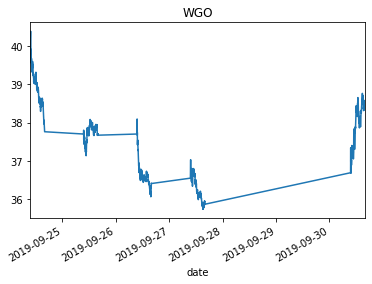

In [17]:
wgo_data['1. open'].plot()
plt.title(ticker)
plt.show()

______

#### Export intraday data to Excel file

Refer to the pandas.DataFrame documentation and create an Excel file that includes your time series data of your stock price:

In [18]:
wgo_data.to_excel("my_WGO_stock_data.xlsx")